# Importing data

* Data are supposed to be aggregated using ODV and exported as aggregated ODV spreadsheet files

In [2]:
import divand
using PyPlot


Aggregated ODV files do not have a semantic header, therefore we need to extract the corresponding column by using the "local" column header name (instead of being able to use the P01 name for the ODV files conforming to 
[Specification of SeaDataNet Data Transport Formats](https://www.seadatanet.org/content/download/636/3333/file/SDN2_D85_WP8_Datafile_formats.pdf?version=2)).


By default only `good` and `probably good` values are loaded. This can be changed using the optional parameter `qv_flags`:

In [3]:
?divand.ODVspreadsheet.load

```
 profiles,lons,lats,depths,times,ids = load(T,fnames,datanames;
    qv_flags = [GOOD_VALUE,PROBABLY_GOOD_VALUE],
    nametype = :P01)
```

Load all profiles in all file from the array `fnames` corresponding to one of the parameter names `datanames`. If `nametype` is `:P01` (default), the datanames are P01 vocabulary names with the SDN prefix. If nametype is `:localname`, then they are the ODV column header. The resulting vectors have the data type `T` (expect `times` and `ids` which are vectors of `DateTime` and `String` respectively). Only values matching the quality flag `qv_flags` are retained.

No checks are done if the units are consistent.

If the ODV does not contain a semantic header (e.g. for the aggregated ODV files), then local names must be used.

```julia-repl
julia> data,lon,lat,depth,time,ids = divand.ODVspreadsheet.load(Float32,["data_from_med_profiles_non-restricted_v2.txt"],
                                       ["Water body salinity"]; nametype = :localname );
```

```
 profiles,lons,lats,depths,times,ids = load(T,dir,P01names)
```

Load all ODV files under the directory `dir` corresponding the one of the parameter names `P01names`. The resulting vectors have the data type `T` (expect `times` and `ids` which are vectors of `DateTime` and `String` respectively).

No checks are done if the units are consistent.


Substitute the file name `data_from_med_profiles_non-restricted_v2.txt` with the file name of your aggregated ODV file. 

In [4]:
dataname = "Water body salinity"

data,lon,lat,depth,time,ids = divand.ODVspreadsheet.load(Float32,["data_from_med_profiles_non-restricted_v2.txt"],
                           ["Water body salinity"]; nametype = :localname );


Basic range check for the data (and presence of NaN and Inf)

In [5]:
divand.checkobs((lon,lat,depth,time),data,ids)

              minimum and maximum of obs. dimension 1: (16.72791f0, 17.98836f0)
              minimum and maximum of obs. dimension 2: (35.216f0, 36.25f0)
              minimum and maximum of obs. dimension 3: (0.0f0, 4020.6165f0)
              minimum and maximum of obs. dimension 4: (1966-02-13T05:00:00, 2016-11-24T10:39:00)
                          minimum and maximum of data: (37.1775f0, 39.313f0)


In [6]:
data[10]

38.72f0

In [7]:
(lon[10],lat[10],depth[10],time[10])

(17.366f0, 36.25f0, 600.0f0, 1977-04-07T02:00:00)

In [8]:
ids[10]

"681-RNODC_Bottle_10911_123"

The following codes does infact nothing, because all data values are already smaller 100000, but it illustrate how additional range check can be performed.

In [9]:
sel = data .< 100000;
data = data[sel]
lon = lon[sel]
lat = lat[sel]
depth = depth[sel]
time = time[sel]
ids = ids[sel];



In [10]:
divand.checkobs((lon,lat,depth,time),data,ids)


              minimum and maximum of obs. dimension 1: (16.72791f0, 17.98836f0)
              minimum and maximum of obs. dimension 2: (35.216f0, 36.25f0)
              minimum and maximum of obs. dimension 3: (0.0f0, 4020.6165f0)
              minimum and maximum of obs. dimension 4: (1966-02-13T05:00:00, 2016-11-24T10:39:00)
                          minimum and maximum of data: (37.1775f0, 39.313f0)


In [11]:
sel = (depth .< 50) .& (Dates.month.(time) .== 8)
@show sum(sel)
@show length(data)

sum(sel) = 245
length(data) = 28264


28264

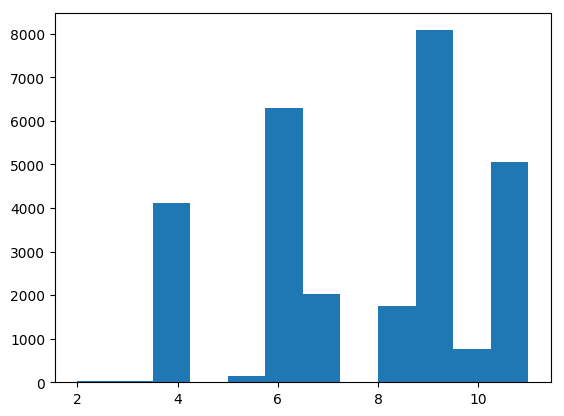

(2, 11)

In [12]:
PyPlot.plt[:hist](Dates.month.(time),12)
extrema(Dates.month.(time))

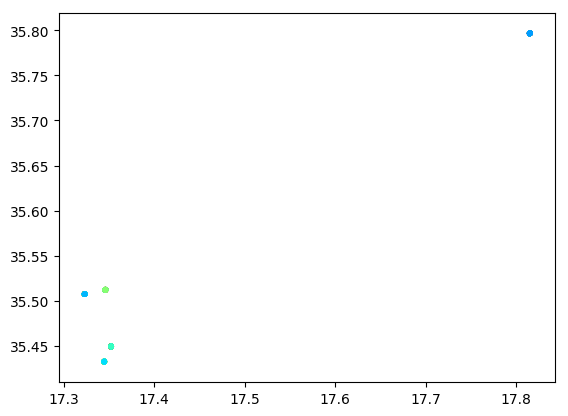

PyObject <matplotlib.collections.PathCollection object at 0x7fa44520d650>

In [13]:
scatter(lon[sel],lat[sel],10,data[sel])